# Basic concept

**In this section:**
* what is

## A finite derivative estimate

Recall, from our earlier work on calculus that the derivative of a function $y(x)$ at the point $x_k$ is defined via a limit

```{math}
y^{\prime}(x_k)=\lim_{h\rightarrow 0}\frac{y(x_k+h)-y(x_k)}{h}
```

This result may be interpreted as the slope of the secant line between two neighbouring points on the curve $y(x)$, as illustrated below. The two points are brought together on the curve in the formal limit, by allowing $h$ to approach zero.

<br>

```{image} images/secant.png
:alt: secant
:align: center
:scale: 100%
```
<br>

Instead of finding the derivative analytically, we will estimate its value numerically by treating $h$ as a small-but-finite quantity in the following expression

```{math}
:label: finite1
y^{\prime}(x_k)=\frac{y(x_k+h)-y(x_k)}{h}
```

We expect that choosing smaller values of $h$ will give results that are closer to the actual (analytic) derivative

```{exercise}
According to formula {eq}`finite1` we can estimate that the derivative of $y(x)=\sin(x)$ at the point $x=\frac{\pi}{3}$ is given by
\begin{equation}y^{\prime}\left(\frac{\pi}{3}\right)\approx \frac{1}{h}\left[\sin\left(\frac{\pi}{3}+h\right)-\sin\left(\frac{\pi}{3}\right)\right]\end{equation}

Use Python to estimate the size of the error in this expression for some different step sizes $h$ and produce a plot of the result.

```

### Solution and commentary

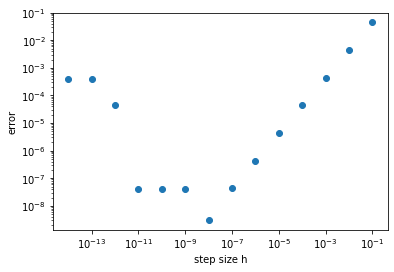

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xk=np.pi/3                           #location

y = lambda x: np.sin(x)              #function to be differentiatied
yd= lambda x: np.cos(x)              #analytic result

j = np.arange(1, 15, 1)
h = 10.0 ** -j                       #array of h values
d = (y(xk + h) - y(xk))/h            #finite difference formula
e=np.abs(d-yd(xk))                   #error in estimate
plt.loglog(h,e,'o')                  #Log-Log scale

plt.xlabel("step size h")
plt.ylabel("error")
plt.show()

Notice that the size of the error is linearly proportional to the step size $h$, down to around $h=10^{-8}$. We expected that shrinking $h$ would reduce the error, but might not have anticipated that the relationship would be linear. Changing the function $f(x)$ or the value $x_k$ will not affect the result, which will be explained in the next chapter.

**Roundoff errors**

For step sizes smaller than $10^{-8}$ the error starts to grow again or behave unpredictably. This is not a mathematical error, but is due to roundoff errors that occur due to the way that computers handle numeric calculations.

In most computers and software applications, numbers are stored in computer memory using either a 32 bit or a 64 bit binary representation. The latter, which is used by Python's `float` is equivalent to around 16 significant digits of decimal precision. As a result, the difference between two numbers that are very close together may be computed inaccurately.

```{admonition} See also
:class: readmore
A description of the issues and limitations can be found in the Python documentation on [Floating Point Arithmetic](https://docs.python.org/3/tutorial/floatingpoint.html). The terminology refers to the fact that there isn't a fixed number of digits before/after the point separating the integer part of the number from its fractional part, so the point can "float" during calculation.
```

For this example, at step size $h=10^{-9}$ the difference between the two sine terms can be accurately computed (using high precision arithmetic) as

\begin{equation}\sin(x_k+10^{-9})-\sin(x_k) = 4.999999995669873\times 10^{-10}\end{equation}

However, with the precision available to `float` it is determined to be
\begin{equation}\sin(x_k+10^{-9})-\sin(x_k) = 5.000000413701855\times 10^{-10}\end{equation}

The difference occurs in the seventh significant figure and this explains why the error in the computed answer is around $10^{-7}$

We can eliminate roundoff errors by increasing the number of digits used in internal computations to obtain a graph like the one below, in which the errors are seen to continue decreasing linearly for smaller step sizes.

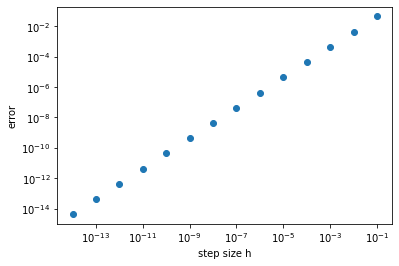

In [2]:
import mpmath as mp
import matplotlib.pyplot as plt
mp.dps = 15;
h=[10.0**-n for n in range(1,15)]
e=[mp.cos(mp.pi/3)-mp.diff(mp.sin,mp.pi/3,h=10.0**-n, direction=1) for n in range(1,15)]
plt.loglog(h,e,'o')

plt.xlabel("step size h")
plt.ylabel("error")
plt.show()

```{admonition} Why we won't be using higher precision arithmetic
:class: danger
Using higher precision arithmetic is computationally **very** costly, and in scientific calculations this is usually important. It is common for computer calculations performed by researchers to take hours or even days to evaluate on a supercomputer. If these researchers were working with high precision arithmetic, their calculations could take weeks, months, or even centuries!

Therefore use of higher precision arithmetic not normally a "good" way to solve numeric problems. We want the computer to work smarter, not harder. We will develop more efficient algorithms that can give the results we require using `float` arithmetic.

*Note: Whilst higher precision is always nice to have, it may not always be required. Here we were already able to straightforwardly obtain around five or six digits of accuracy in the solution, which is enough for many problems.
```

## Application to a set of points

In the previous subsection we estimated the derivative of a function at a single point. We can apply the same technique for a set of points, using the slope connecting each point to a neighbour.

```{exercise}
Taking `h=1e-4` in the finite difference formula {eq}`finite1`, plot a numeric estimate of $y^{\prime}(x)$ on the interval -$\pi\leq x \leq \pi$, for the function
\begin{equation*}y(x)=\sin(x)+x.\end{equation*}
 To produce the plot you will need to choose a suitable set of $x$ values. For instance, you might choose 100 equally spaced values, including the two endpoints of the interval. The values can be easily generated using the `numpy.linspace` function.
```

### Solution and commentary

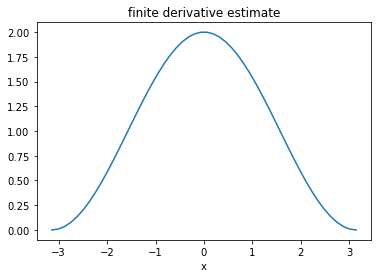

In [3]:
import numpy as np
import matplotlib.pyplot as plt

y= lambda x: np.sin(x)+x          #function to be differentiated
xk = np.linspace(-np.pi,np.pi)    #array of 100 equally spaced values

h=1e-4                            #step size
d = (y(xk+h)-y(xk))/h             #derivative estimate

plt.plot(xk,d)
plt.xlabel('x')
plt.title('finite derivative estimate')
plt.show()

In this example, the step size $h$ used in the finite difference formula was not the same as the spacing between the chosen $x$ values. It is convenient to match the two. This approach will also allow us to produce an estimate for the derivative of a function that is represented by a set of points, such as experimental data:

\begin{equation}(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n).\end{equation}

We can approximate the derivative of the hypothetical function described by these points, using the following formula

\begin{equation}y_k^{\prime}\simeq\frac{y_{k+1}-y_k}{x_{k+1}-x_k}.\end{equation}

For simplicity we will assume that the spacing $h_k=(x_{k+1}-x_k)$ is the same value $h$ for all neighbours, though this isn't strictly necessary, which gives:

\begin{align}y^{\prime}&=\biggr[\frac{y_2-y_1}{h},\frac{y_3-y_2}{h},\dots,\frac{y_n-y_{n-1}}{h}\biggr]\\&=\frac{[y_2,y_3,\dots,y_n]-[y_1,y_2,\dots,y_{n-1}]}{h}\end{align}

The idea is illustrated in the schematic diagram below. Essentially, we are joining up the points with straight lines and using the slope of those line segments to estimate the gradient at the left-hand point of each interval.

```{image} images/griddly3.png
:alt: computing the derivative from secant lines
:height: 300px
:align: center
```

The code below provides an implementation of the formula for a given set of points to find the derivative estimate at the values where it is available. Try out this code for a given set of datapoints representing a function $y(x)$. You could also try applying the function twice, to find the second derivative, but note that the approximation gets progressively worse (and probably less smooth) each time it is applied.

In [4]:
def forward_diff(x,y):

    # Assuming equal grid spacing h
    h = x[1]-x[0]
    d = (y[1:]-y[0:-1])/h

    # OR
    # No assumption of equal grid spacing
    d = (y[1:]-y[0:-1])/(x[1:]-x[0:-1])

    return d

```{warning}
Notice that with $n$ data points we can only find the derivative at the first $(n-1)$ points, because the forward projection of the function at the final point is not known. If we wish to obtain the derivative at $x_n$, we require the exterior value $(x_{n+1},y_{n+1})$.
```